# License Plate Detection using MSER Algorithm

This notebook demonstrates license plate detection using MSER (Maximally Stable Extremal Regions) algorithm with OpenCV. MSER is particularly effective for detecting text-like regions in images, making it suitable for license plate detection.

## 1. Import Required Libraries

Import OpenCV and NumPy libraries needed for image processing and MSER detection.

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline

## 2. Load and Prepare Image

Load the sample image and convert it to grayscale for MSER processing. MSER works on single-channel images.

Image loaded successfully. Shape: (480, 640, 3)


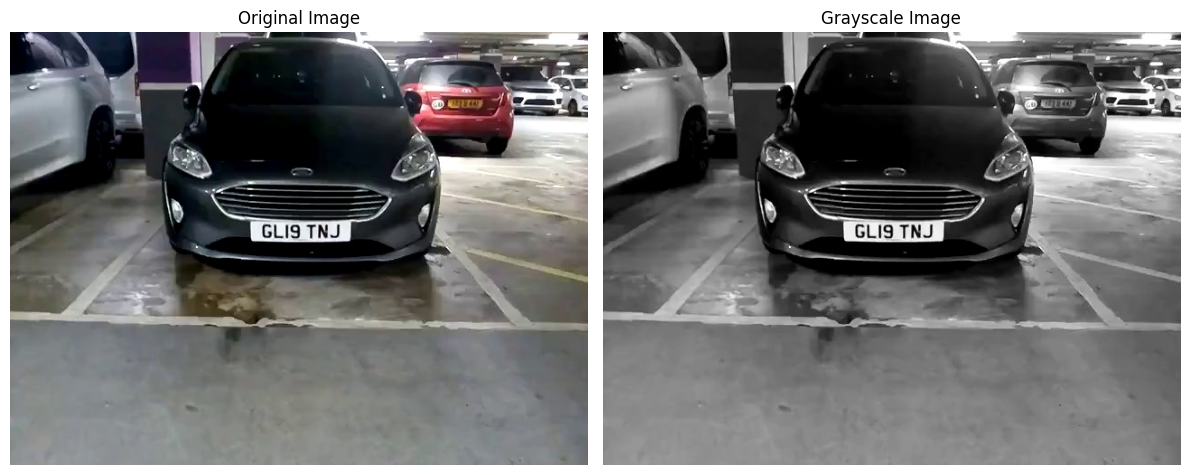

In [4]:
# Load image
image = cv2.imread("./sample_images/1.jpg")
if image is None:
    print("Error: Could not load image. Please check the file path.")
else:
    print(f"Image loaded successfully. Shape: {image.shape}")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the original and grayscale images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Convert BGR to RGB for proper display in matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
ax1.imshow(image_rgb)
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(gray, cmap='gray')
ax2.set_title('Grayscale Image')
ax2.axis('off')

plt.tight_layout()
plt.show()

## 3. Initialize MSER Detector

Create an MSER detector object with default parameters. MSER detects stable regions in the image that remain unchanged under intensity transformations.

In [5]:
# Initialize MSER detector
mser = cv2.MSER_create()
print("MSER detector initialized successfully")

# Optional: Display MSER parameters
print("\nMSER Parameters:")
print(f"Delta: {mser.getDelta()}")
print(f"Min Area: {mser.getMinArea()}")
print(f"Max Area: {mser.getMaxArea()}")

MSER detector initialized successfully

MSER Parameters:
Delta: 5
Min Area: 60
Max Area: 14400


## 4. Detect MSER Regions

Use the MSER detector to find regions in the grayscale image and visualize all detected regions.

Total MSER regions detected: 687


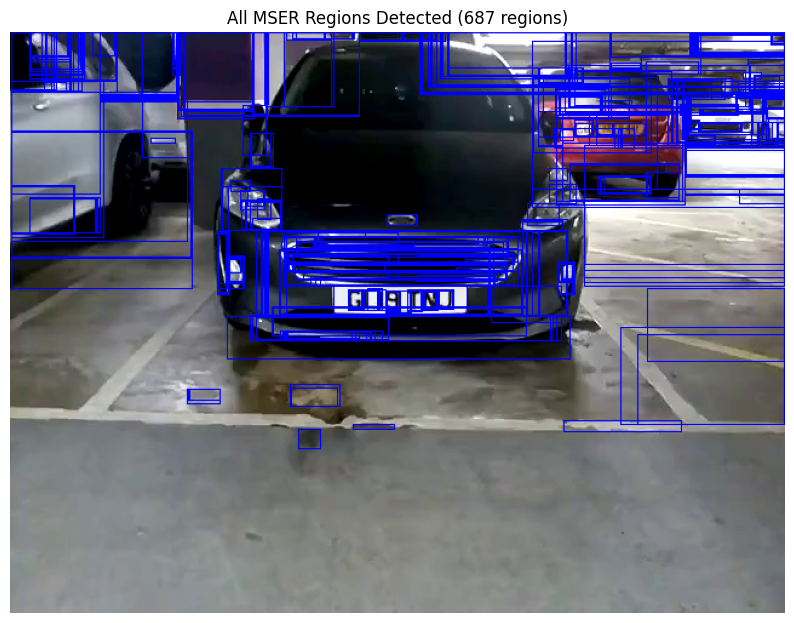

In [6]:
# Detect MSER regions
regions, _ = mser.detectRegions(gray)
print(f"Total MSER regions detected: {len(regions)}")

# Create a visualization of all MSER regions
all_regions_image = image.copy()
for i, region in enumerate(regions):
    # Get bounding rectangle for each region
    x, y, w, h = cv2.boundingRect(region.reshape(-1, 1, 2))
    # Draw all regions in blue
    cv2.rectangle(all_regions_image, (x, y), (x + w, y + h), (255, 0, 0), 1)

# Display all detected regions
plt.figure(figsize=(10, 8))
all_regions_rgb = cv2.cvtColor(all_regions_image, cv2.COLOR_BGR2RGB)
plt.imshow(all_regions_rgb)
plt.title(f'All MSER Regions Detected ({len(regions)} regions)')
plt.axis('off')
plt.show()

## 5. Filter Regions by Aspect Ratio and Size

Filter detected regions based on aspect ratio (1.5-6.0) and size constraints to identify potential license plates. License plates typically have specific dimensional characteristics.

In [7]:
# Filter regions based on license plate characteristics
filtered_regions = []
filtered_info = []

for region in regions:
    x, y, w, h = cv2.boundingRect(region.reshape(-1, 1, 2))
    aspect_ratio = w / h if h > 0 else 0
    area = w * h
    
    # License plate filtering criteria
    if (1.5 < aspect_ratio < 6.0 and 
        30 < w < 300 and 
        10 < h < 100):
        filtered_regions.append((x, y, w, h))
        filtered_info.append({
            'bbox': (x, y, w, h),
            'aspect_ratio': aspect_ratio,
            'area': area
        })

print(f"Regions after filtering: {len(filtered_regions)}")
print("\nFiltered region details:")
for i, info in enumerate(filtered_info):
    print(f"Region {i+1}: bbox={info['bbox']}, aspect_ratio={info['aspect_ratio']:.2f}, area={info['area']}")

Regions after filtering: 197

Filtered region details:
Region 1: bbox=(26, 1, 62, 39), aspect_ratio=1.59, area=2418
Region 2: bbox=(26, 1, 62, 39), aspect_ratio=1.59, area=2418
Region 3: bbox=(26, 1, 62, 40), aspect_ratio=1.55, area=2480
Region 4: bbox=(1, 1, 87, 49), aspect_ratio=1.78, area=4263
Region 5: bbox=(1, 1, 87, 49), aspect_ratio=1.78, area=4263
Region 6: bbox=(1, 1, 87, 49), aspect_ratio=1.78, area=4263
Region 7: bbox=(1, 1, 87, 49), aspect_ratio=1.78, area=4263
Region 8: bbox=(1, 1, 87, 49), aspect_ratio=1.78, area=4263
Region 9: bbox=(1, 1, 87, 49), aspect_ratio=1.78, area=4263
Region 10: bbox=(226, 170, 193, 39), aspect_ratio=4.95, area=7527
Region 11: bbox=(226, 170, 193, 39), aspect_ratio=4.95, area=7527
Region 12: bbox=(226, 170, 193, 40), aspect_ratio=4.83, area=7720
Region 13: bbox=(226, 169, 193, 41), aspect_ratio=4.71, area=7913
Region 14: bbox=(543, 40, 36, 16), aspect_ratio=2.25, area=576
Region 15: bbox=(466, 33, 80, 28), aspect_ratio=2.86, area=2240
Region 16: 

## 6. Draw Bounding Rectangles

Draw green bounding rectangles around filtered regions that match license plate characteristics.

In [8]:
# Create a copy of the original image for drawing results
result_image = image.copy()

# Draw bounding rectangles for filtered regions
for x, y, w, h in filtered_regions:
    cv2.rectangle(result_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # Add region number as label
    cv2.putText(result_image, f'Plate?', (x, y-10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

print(f"Drew {len(filtered_regions)} potential license plate regions")

Drew 197 potential license plate regions


## 7. Display Results

Display the original image with detected license plate regions highlighted, along with a comparison view.

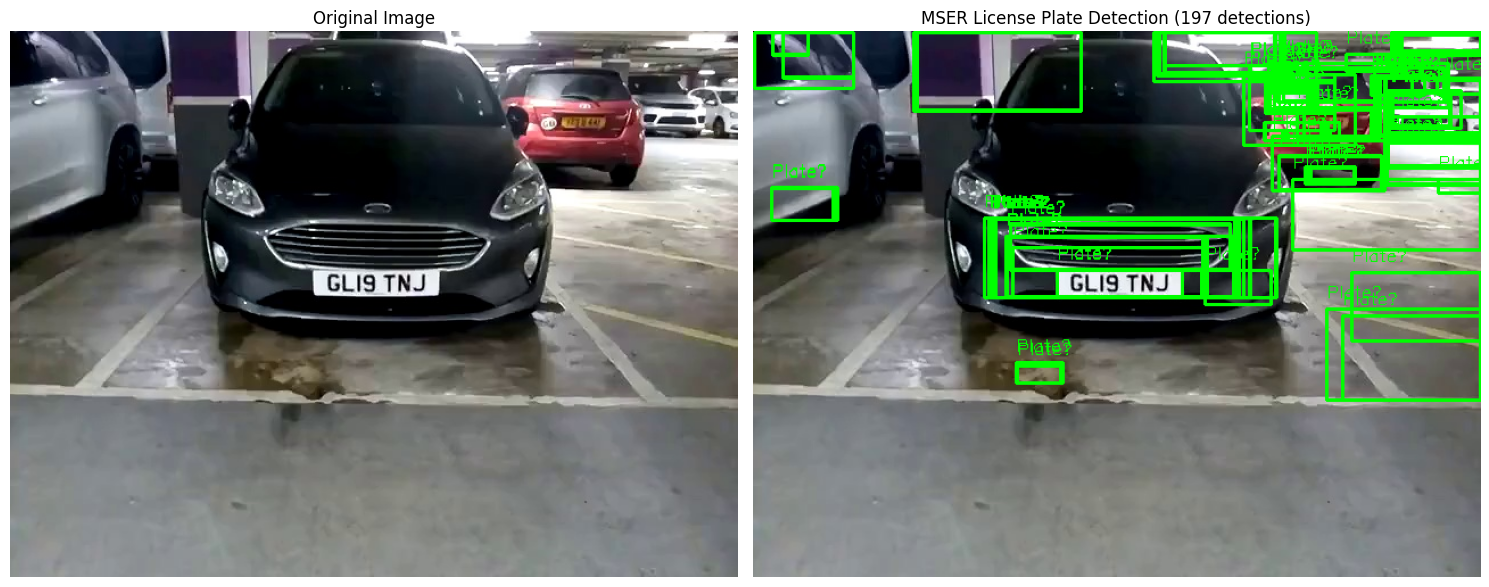


=== Detection Summary ===
Total MSER regions found: 687
Regions after filtering: 197
Filter criteria:
  - Aspect ratio: 1.5 to 6.0
  - Width: 30 to 300 pixels
  - Height: 10 to 100 pixels


In [9]:
# Display the final result
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Original image
original_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
ax1.imshow(original_rgb)
ax1.set_title('Original Image')
ax1.axis('off')

# Result with detections
result_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
ax2.imshow(result_rgb)
ax2.set_title(f'MSER License Plate Detection ({len(filtered_regions)} detections)')
ax2.axis('off')

plt.tight_layout()
plt.show()

# Summary statistics
print("\n=== Detection Summary ===")
print(f"Total MSER regions found: {len(regions)}")
print(f"Regions after filtering: {len(filtered_regions)}")
print(f"Filter criteria:")
print(f"  - Aspect ratio: 1.5 to 6.0")
print(f"  - Width: 30 to 300 pixels")
print(f"  - Height: 10 to 100 pixels")

## 8. Test with Different Images (Optional)

You can test the detection algorithm with other images in the sample_images folder.

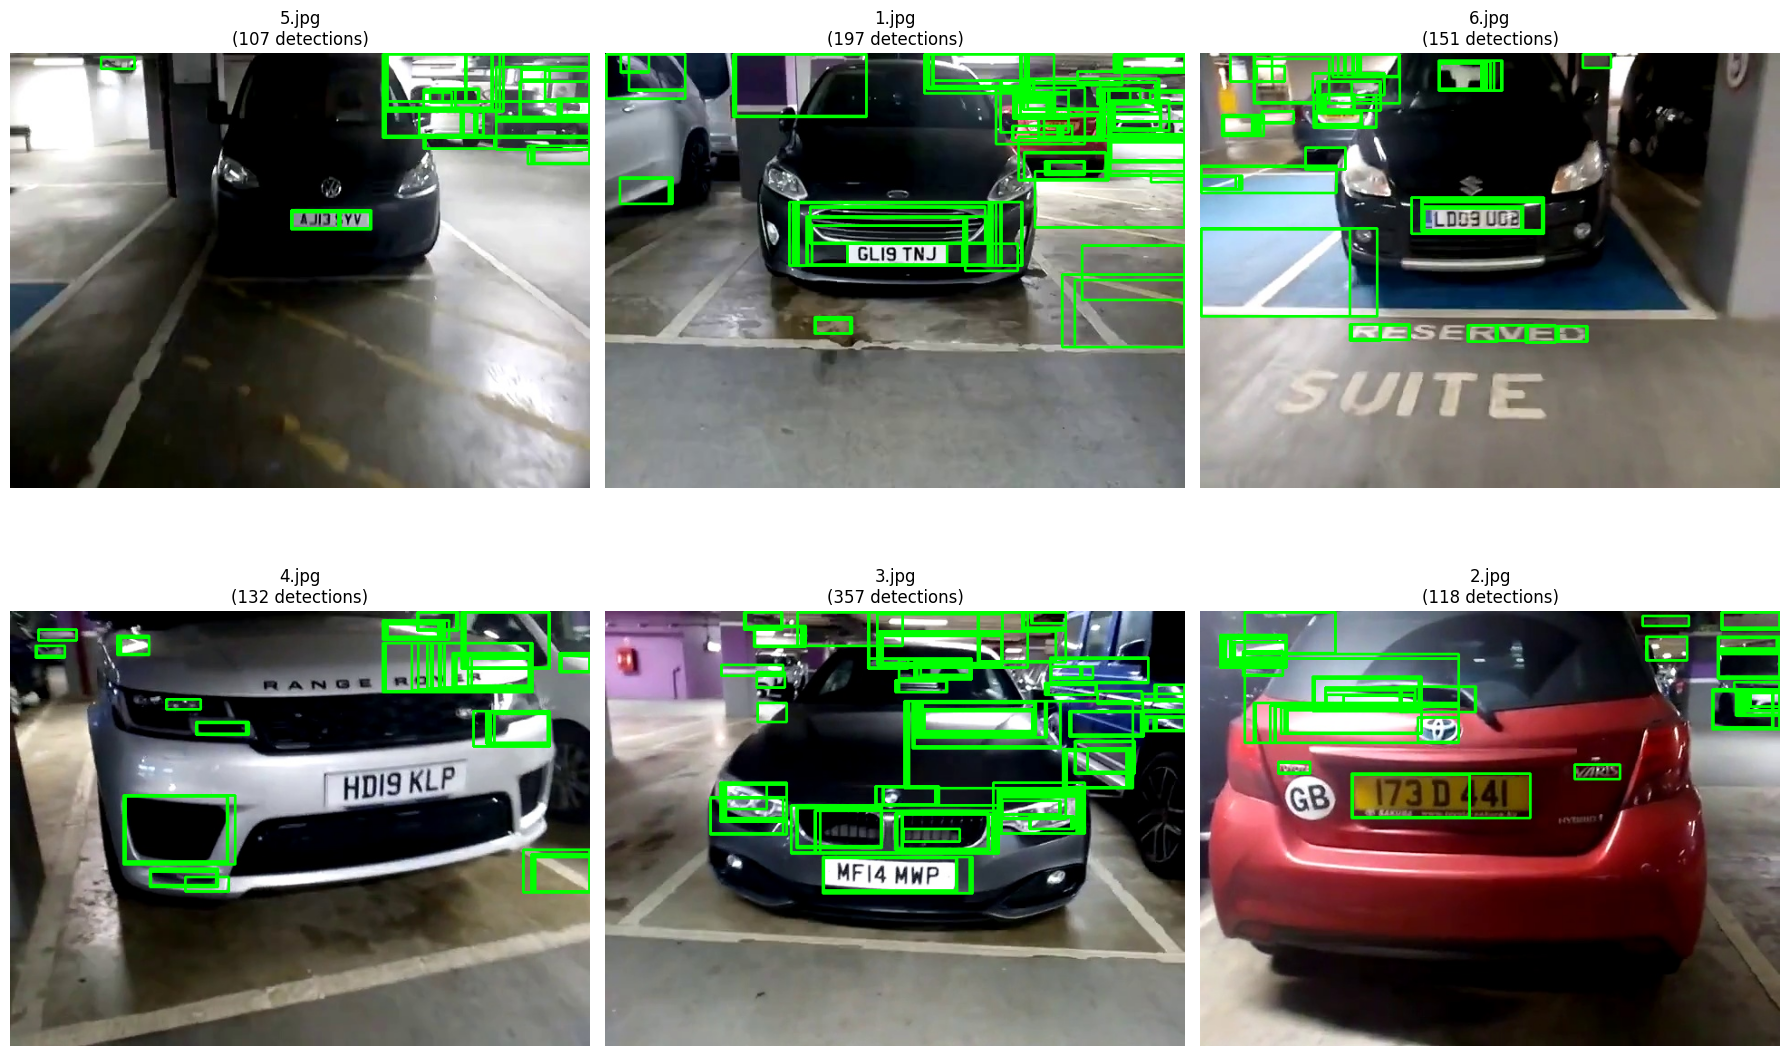

In [10]:
# Function to process multiple images
def detect_license_plates(image_path):
    """Process a single image and return detection results"""
    img = cv2.imread(image_path)
    if img is None:
        return None, 0
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mser = cv2.MSER_create()
    regions, _ = mser.detectRegions(gray)
    
    filtered_count = 0
    result_img = img.copy()
    
    for region in regions:
        x, y, w, h = cv2.boundingRect(region.reshape(-1, 1, 2))
        aspect_ratio = w / h if h > 0 else 0
        
        if (1.5 < aspect_ratio < 6.0 and 
            30 < w < 300 and 
            10 < h < 100):
            cv2.rectangle(result_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            filtered_count += 1
    
    return result_img, filtered_count

# Test with multiple images
import os
sample_dir = "./sample_images"
if os.path.exists(sample_dir):
    image_files = [f for f in os.listdir(sample_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    for i, img_file in enumerate(image_files[:6]):  # Process up to 6 images
        img_path = os.path.join(sample_dir, img_file)
        result, count = detect_license_plates(img_path)
        
        if result is not None and i < len(axes):
            result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
            axes[i].imshow(result_rgb)
            axes[i].set_title(f'{img_file}\n({count} detections)')
            axes[i].axis('off')
    
    # Hide unused subplots
    for j in range(len(image_files), len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("Sample images directory not found.")